# 💡 Shapley Values

Os **Shapley Values** são uma técnica importante na **interpretação de modelos de machine learning**, e fornecem uma maneira de **quantificar a contribuição de cada variável** para a previsão de um modelo em um **nível individual ou agregado**.

---

Os Shap Values são **calculados com base no conceito de Teoria dos Jogos**, atribuindo a cada variável uma **contribuição proporcional à sua importância** na explicação das diferenças entre:
- 🔄 A previsão do modelo
- 📊 A previsão média do conjunto de dados

---

Isso permite aos cientistas de dados:
- 🧠 Entender **como cada variável influencia** as previsões do modelo
- 🔍 **Identificar quais características** são mais importantes para uma determinada instância de dados

In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

### Carregar e visualizar os dados - Regressão

In [2]:
# carregar os dados - regressao
df = pd.read_csv('./datasets/dataset_colesterol.csv')

In [3]:
# visualizar estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# visualizar dataframe
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,6,B,Não,Baixo,68.0,66.8,170.0,185.31
6,7,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,8,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,9,O,Não,Baixo,62.0,81.3,166.0,235.30
9,10,B,Sim,Alto,44.0,32.7,165.0,97.79


In [5]:
# ajustar dataframe
df.drop('Id', axis=1, inplace=True)

# aplicar onehotencoding nas variaveis categoricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'], dtype=int)

In [6]:
df = df.dropna()

In [7]:
# dataframe atualizado
df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,0,0,1,0,0,1,0,1,0
1,68.0,105.0,184.0,236.98,1,0,0,0,1,0,0,0,1
2,25.0,64.8,180.0,161.79,0,0,0,1,1,0,1,0,0
3,43.0,120.2,167.0,336.24,1,0,0,0,1,0,1,0,0
4,79.0,88.5,175.0,226.23,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.0,68.1,166.0,206.81,0,1,0,0,0,1,0,0,1
996,51.0,47.7,170.0,128.03,0,0,0,1,1,0,1,0,0
997,39.0,85.5,176.0,211.14,0,1,0,0,1,0,0,1,0
998,61.0,91.2,161.0,284.53,0,1,0,0,0,1,0,1,0


### Treinar Modelo - Regessão Linear

In [8]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [9]:
# Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [10]:
# Treinar Modelo de Regressão sem RFE
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [11]:
X_train

,Idade,Peso,Altura,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
126,41.0,84.9,177.0,0,1,0,0,0,1,0,1,0
738,29.0,61.1,177.0,0,0,0,1,1,0,1,0,0
672,52.0,46.0,186.0,1,0,0,0,1,0,1,0,0
269,76.0,58.3,180.0,0,0,0,1,1,0,1,0,0
760,32.0,92.0,176.0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
717,27.0,65.0,187.0,0,0,1,0,1,0,0,1,0
978,75.0,80.4,185.0,0,0,0,1,1,0,0,0,1
745,37.0,60.2,186.0,0,0,0,1,1,0,0,0,1
490,73.0,84.6,187.0,0,0,1,0,0,1,0,0,1


### Apresentar Plots Shapley Values - Regressão

### Apresentar Plots Shapley Values - Regressão

In [ ]:
# Rodar o explainer no conjunto de treinamento
explainer_reg = shap.Explainer(model_reg.predict, X_train)

In [ ]:
# Calcular Shapley Values no conjunto de testes
shap_values_reg = explainer_reg(X_test)

PermutationExplainer explainer: 299it [00:14,  9.06it/s]                         


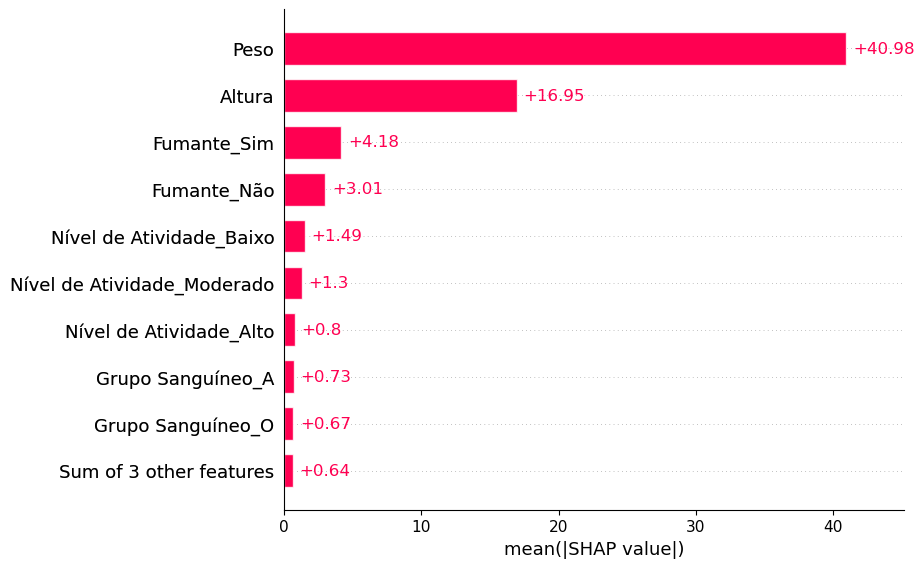

In [ ]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_reg)

In [ ]:
# Mostrar 1ª instância do conjunto de testes
X_test.iloc[0, :]

Idade                           39.0
Peso                            85.5
Altura                         176.0
Grupo Sanguíneo_A                0.0
Grupo Sanguíneo_AB               1.0
Grupo Sanguíneo_B                0.0
Grupo Sanguíneo_O                0.0
Fumante_Não                      1.0
Fumante_Sim                      0.0
Nível de Atividade_Alto          0.0
Nível de Atividade_Baixo         1.0
Nível de Atividade_Moderado      0.0
Name: 997, dtype: float64

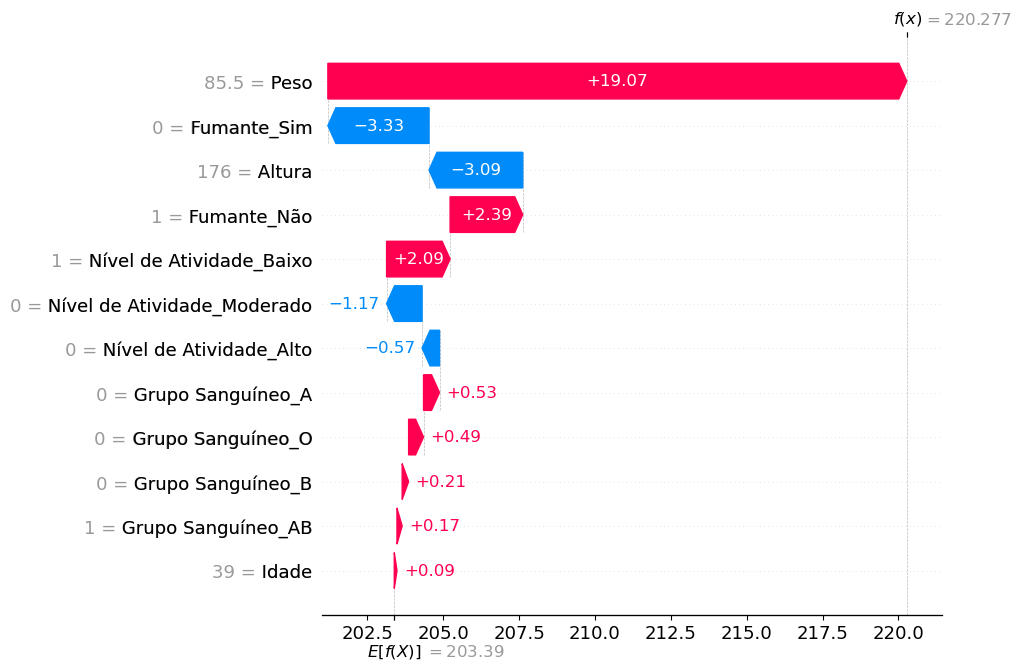

In [ ]:
# Plotar os Shap Values para um exemplo específico
shap.plots.waterfall(shap_values_reg[0], max_display=13)

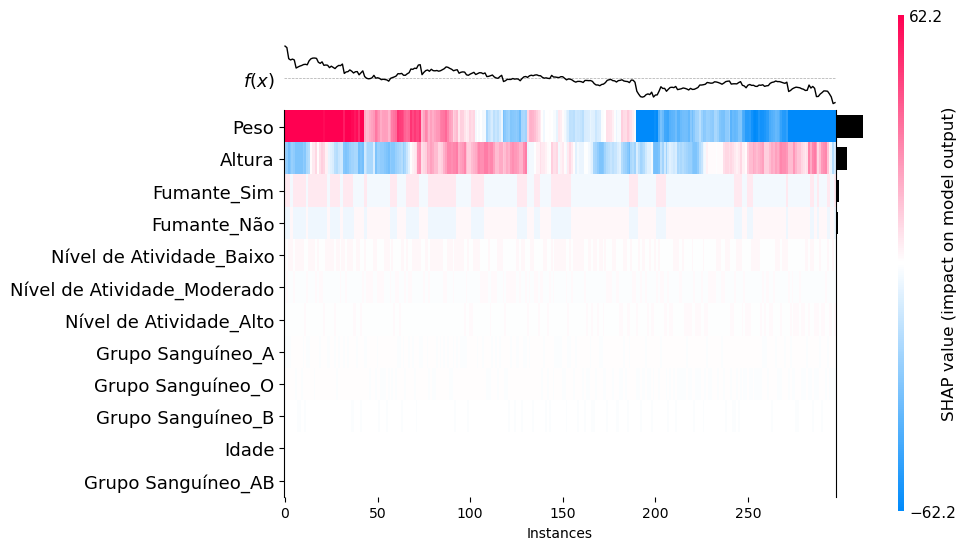

<Axes: xlabel='Instances'>

In [ ]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_reg, max_display=13)

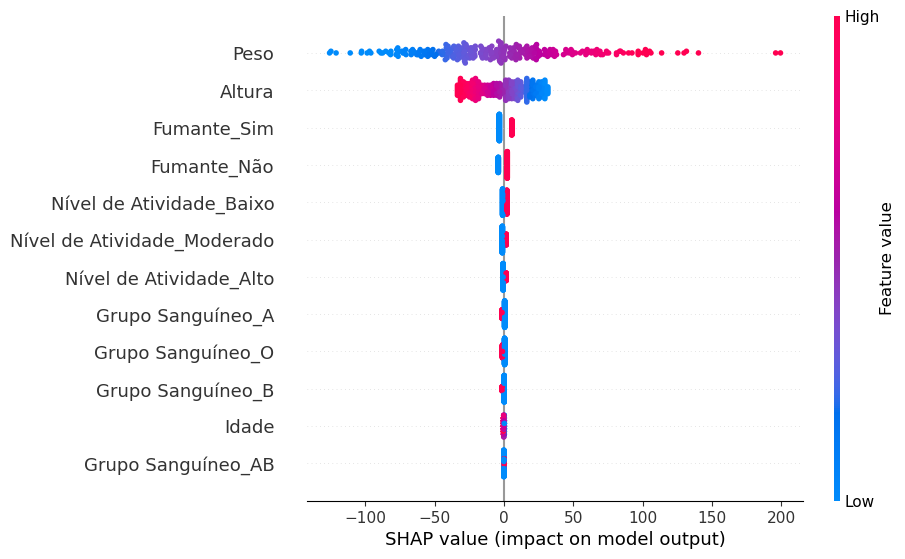

In [ ]:
# Plot de Beewswarm Geral
shap.plots.beeswarm(shap_values_reg, max_display=13)

In [12]:
# Rodar o explainer no conjunto de treinamento
explainer_reg = shap.Explainer(model_reg.predict, X_train)

In [13]:
# Calcular Shapley Values no conjunto de testes
shap_values_reg = explainer_reg(X_test)

PermutationExplainer explainer: 299it [00:14,  9.06it/s]                         


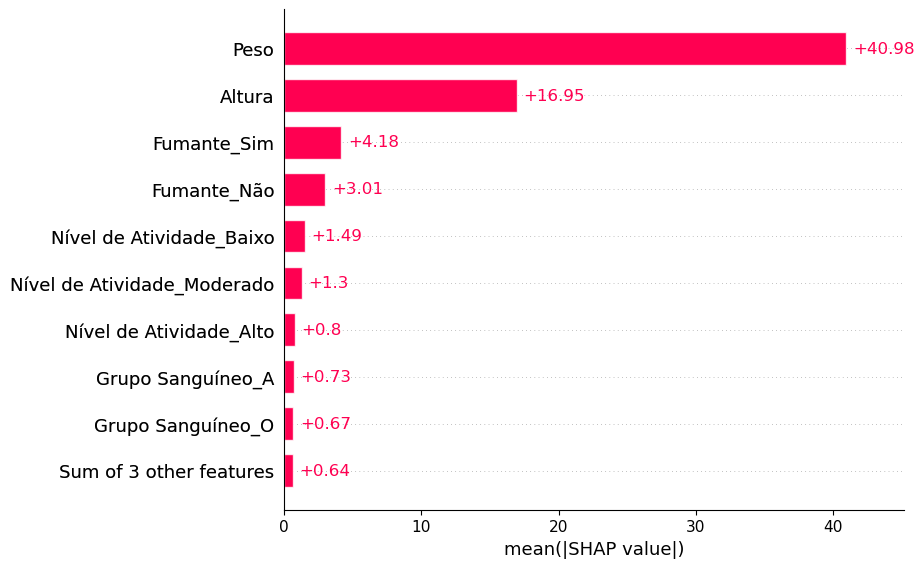

In [14]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_reg)

In [16]:
# Mostrar 1ª instância do conjunto de testes
X_test.iloc[0, :]

Idade                           39.0
Peso                            85.5
Altura                         176.0
Grupo Sanguíneo_A                0.0
Grupo Sanguíneo_AB               1.0
Grupo Sanguíneo_B                0.0
Grupo Sanguíneo_O                0.0
Fumante_Não                      1.0
Fumante_Sim                      0.0
Nível de Atividade_Alto          0.0
Nível de Atividade_Baixo         1.0
Nível de Atividade_Moderado      0.0
Name: 997, dtype: float64

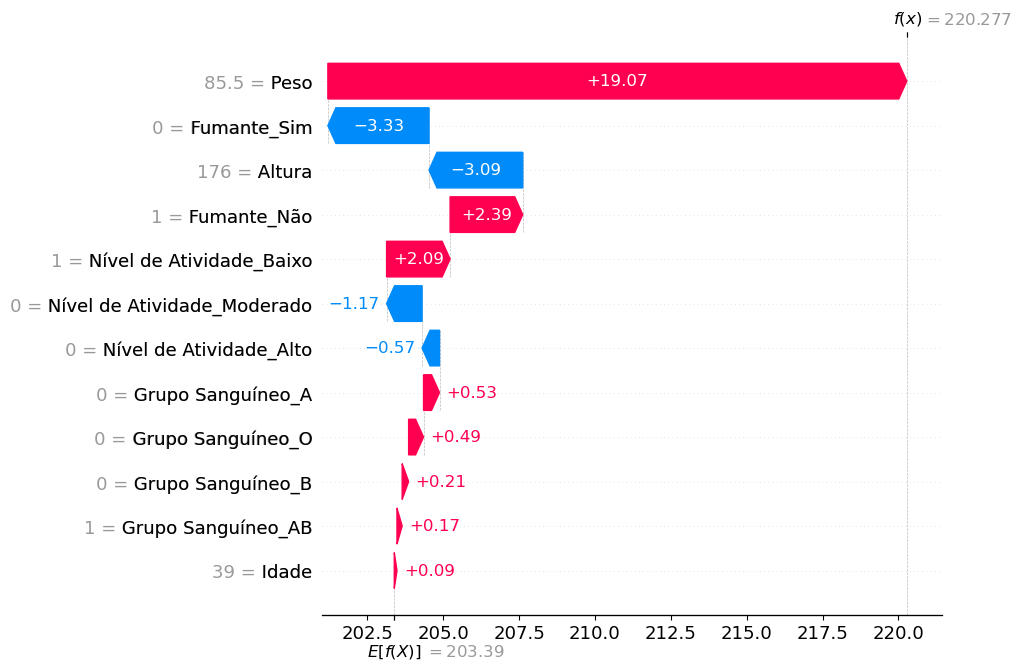

In [17]:
# Plotar os Shap Values para um exemplo específico
shap.plots.waterfall(shap_values_reg[0], max_display=13)

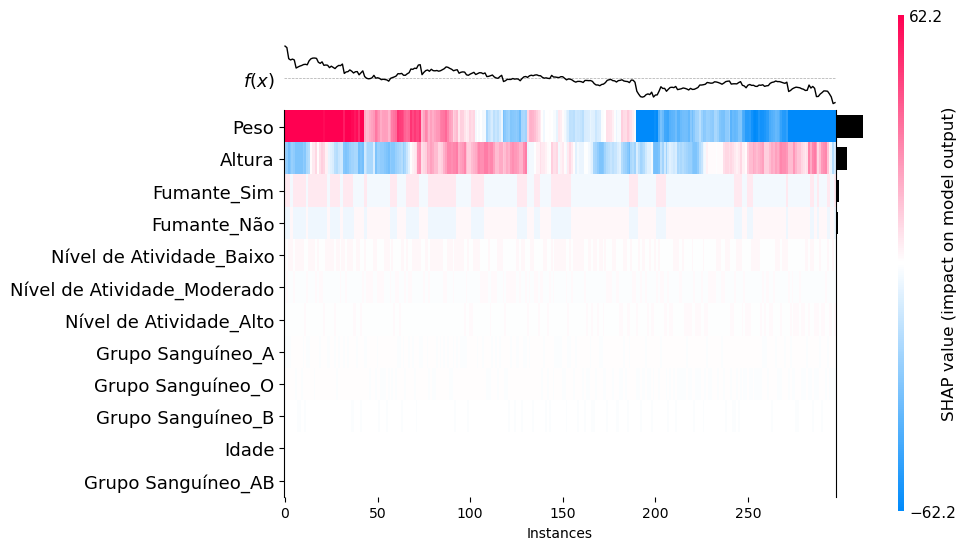

<Axes: xlabel='Instances'>

In [18]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_reg, max_display=13)

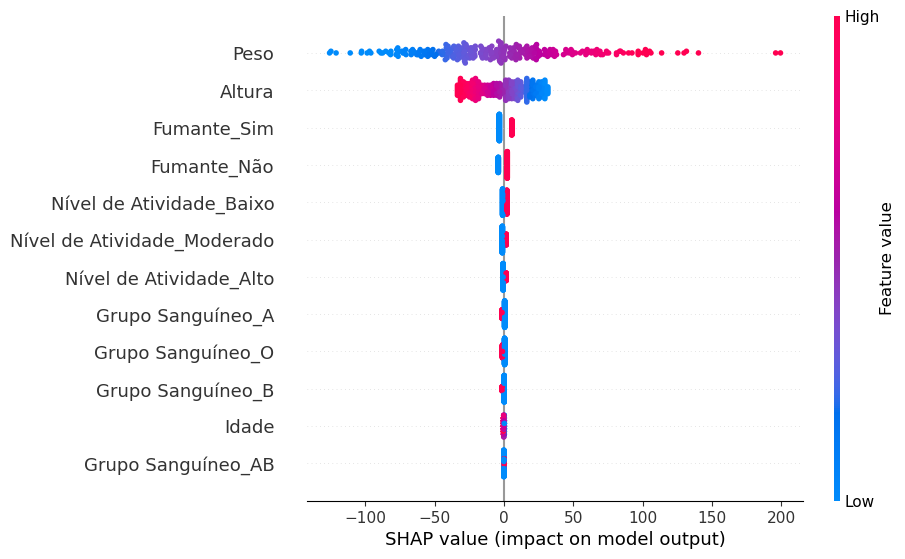

In [19]:
# Plot de Beewswarm Geral
shap.plots.beeswarm(shap_values_reg, max_display=13)

### Carregar e preparar dados - Classificação

In [20]:
# Carregar o dataset
df2 = pd.read_csv('./datasets/fruit_quality.csv')

In [21]:
# Visualizar estrutura
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [22]:
# visualizar df
df.head(10)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,0,0,1,0,0,1,0,1,0
1,68.0,105.0,184.0,236.98,1,0,0,0,1,0,0,0,1
2,25.0,64.8,180.0,161.79,0,0,0,1,1,0,1,0,0
3,43.0,120.2,167.0,336.24,1,0,0,0,1,0,1,0,0
4,79.0,88.5,175.0,226.23,0,1,0,0,1,0,0,1,0
5,68.0,66.8,170.0,185.31,0,0,1,0,1,0,0,1,0
6,60.0,117.3,181.0,289.33,1,0,0,0,0,1,0,1,0
7,35.0,86.9,174.0,216.48,0,0,0,1,0,1,0,0,1
8,62.0,81.3,166.0,235.30,0,0,0,1,1,0,0,1,0
9,44.0,32.7,165.0,97.79,0,0,1,0,0,1,1,0,0


In [23]:
# Ajustar Dataframe

# Remover a coluna 'A_id'
df2.drop('A_id', axis=1, inplace=True)

# Transformar a coluna 'Quality' em 0 ou 1 (binária)
df2['Quality'] = (df2['Quality'] == 'good').astype(int)

# Visualizar resultado
df2


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### Treinar o modelo de Regressão Logística

In [24]:
# Separar X e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']

# Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)


In [25]:
# Treinar modelo sem RFE
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

### Apresentar PLots Shapley Values - Classificação

In [26]:
# Rodar o explainer no conjunto de treinamento
explainer_class = shap.Explainer(model_lr.predict, X_train)

In [27]:
# Calcular Shapley Values no conjunto de testes
shap_values_class = explainer_class(X_test)

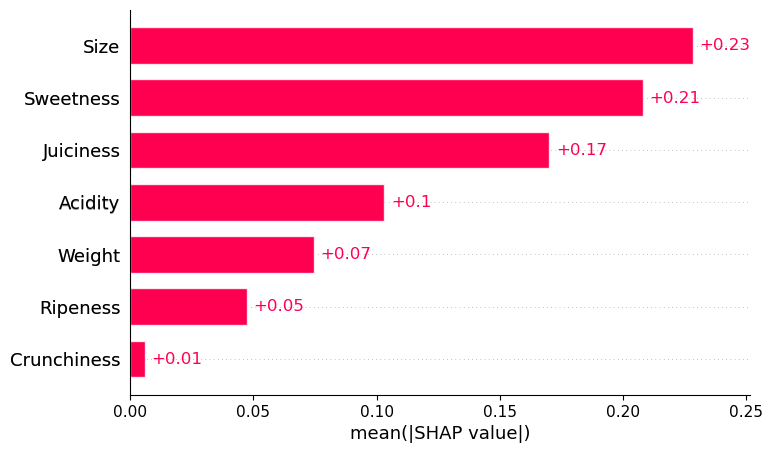

In [28]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_class)

In [29]:
# Mostrar 1ª instância do conjunto de testes
X_test.iloc[0, :]

Size           1.819744
Weight        -1.174086
Sweetness     -2.772288
Crunchiness   -0.039636
Juiciness     -1.437848
Ripeness       1.648811
Acidity       -1.098697
Name: 1150, dtype: float64

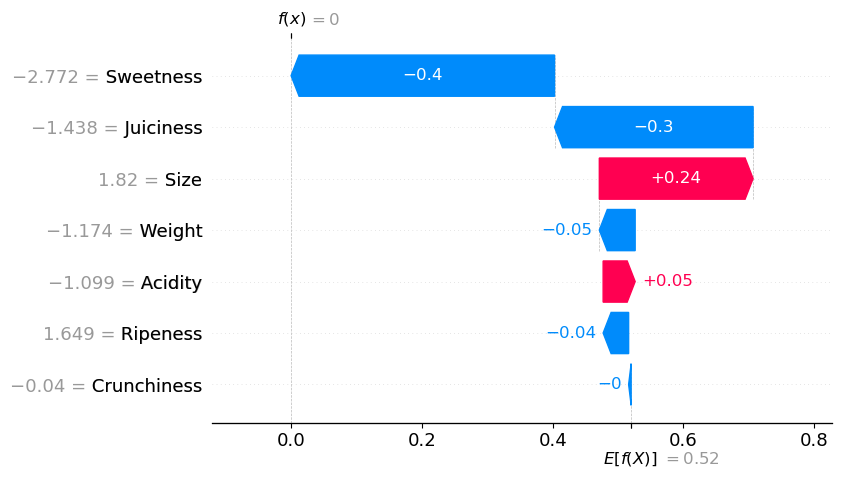

In [32]:
# Plotar os Shap Values para um exemplo específico
shap.plots.waterfall(shap_values_class[0], max_display=13)

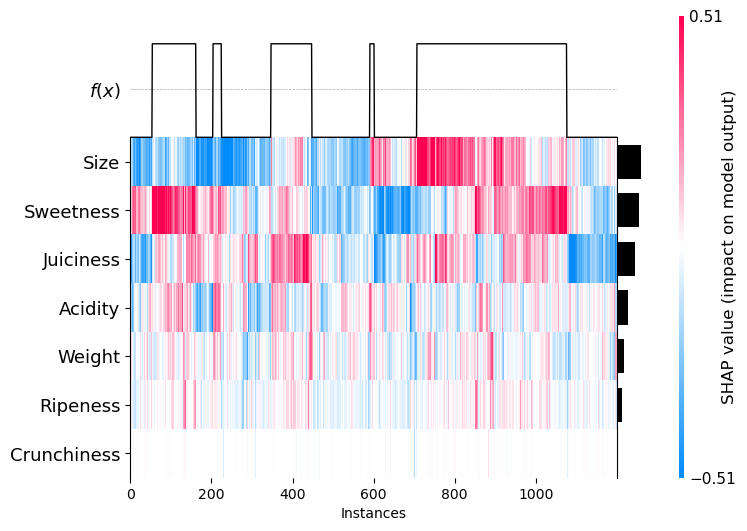

<Axes: xlabel='Instances'>

In [31]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_class, max_display=13)

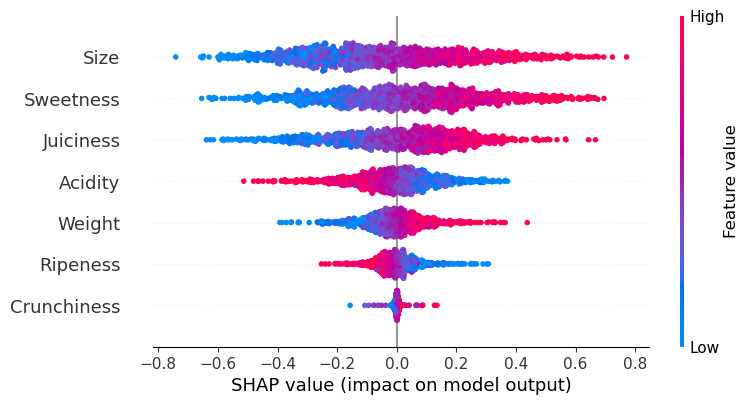

In [33]:
# Plot de Beeswarm Geral
shap.plots.beeswarm(shap_values_class, max_display=13)